In [148]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [114]:
plt.style.use('fivethirtyeight')

In [123]:
client = MongoClient('localhost', 27017)
db = client.wow2v2_rate
wow = db["wowru2020-07-22"]

In [124]:
rate = []
for item in wow.find({}):
   rate.append(item)

In [125]:
rate = pd.DataFrame(rate)

In [161]:
rate['unit'] =  rate['wow_class'] + "-" + rate['spec']

In [138]:
rate.unit.value_counts().array

<PandasArray>
[133, 113,  99,  89,  85,  71,  57,  42,  39,  32,  29,  27,  27,  23,  20,
  18,  16,   9,   7,   7,   7,   6,   5,   5,   5,   5,   4,   4,   3,   3,
   2,   2,   1,   1]
Length: 34, dtype: int64

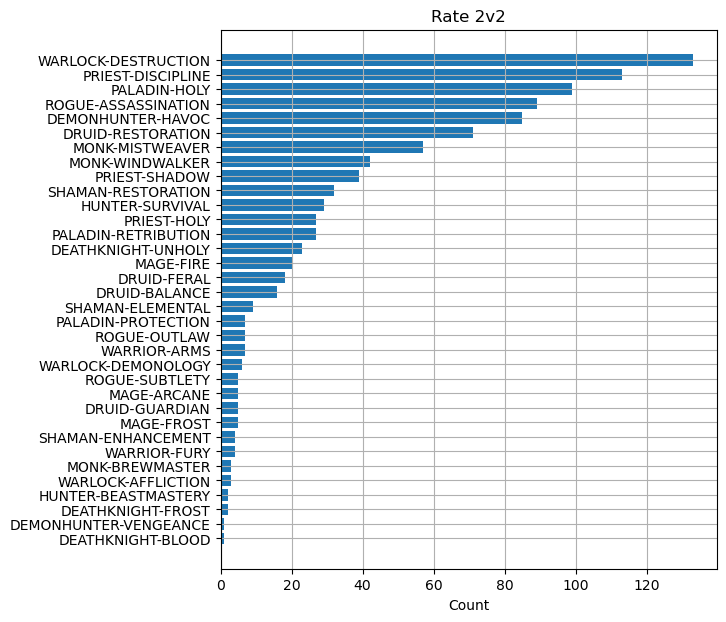

In [162]:
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(np.arange(len(rate.unit.value_counts().index)), rate.unit.value_counts().array, align='center')
ax.set_yticks(np.arange(len(rate.unit.value_counts().index)))
ax.set_yticklabels(rate.unit.value_counts().index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.grid()
ax.set_xlabel('Count')
ax.set_title('Rate 2v2')

fig.set_figheight(7)

plt.show()

In [189]:
mean_rate = rate.groupby('unit').mean()[['rate']].sort_values('rate')

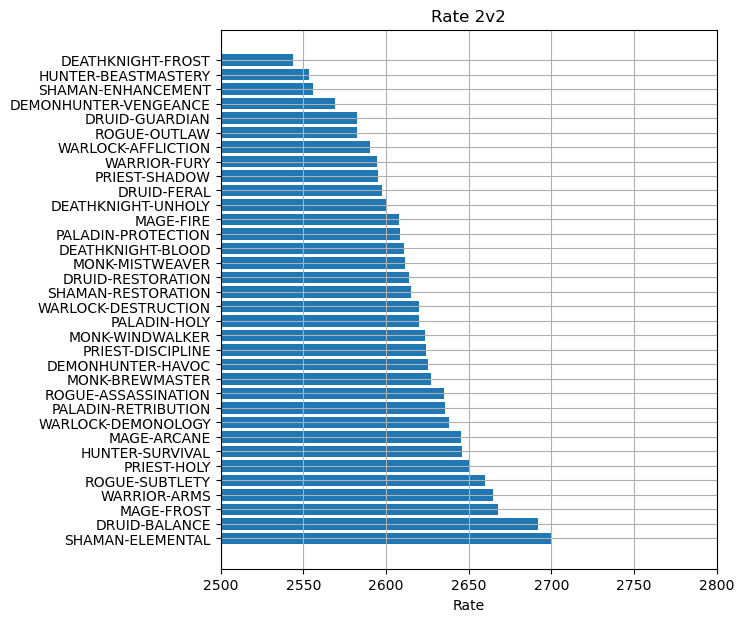

In [192]:
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(np.arange(len(mean_rate)), mean_rate['rate'].array, align='center')
ax.set_yticks(np.arange(len(mean_rate)))
ax.set_yticklabels(mean_rate.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.grid()
ax.set_xlabel('Rate')
ax.set_title('Rate 2v2')
ax.set_xlim([2500, 2800])

fig.set_figheight(7)

plt.show()

0      3102
1      2820
2      2821
3      2821
4      2744
       ... 
991    3029
992    3030
993    3048
994    3066
995    2633
Name: rate, Length: 996, dtype: int64

In [172]:
len(rate.groupby('unit').mean()[['rate']])

34

,rate
unit,
DEATHKNIGHT-FROST,2544.000000
HUNTER-BEASTMASTERY,2553.500000
SHAMAN-ENHANCEMENT,2555.750000
DEMONHUNTER-VENGEANCE,2569.000000
DRUID-GUARDIAN,2582.400000
ROGUE-OUTLAW,2582.428571
WARLOCK-AFFLICTION,2590.666667
WARRIOR-FURY,2594.500000
PRIEST-SHADOW,2595.128205
